In [112]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
zero = np.array([1, 0])
one = np.array([0, 1])

In [3]:
zero2 = np.kron(zero, zero)

In [4]:
zero2

array([1, 0, 0, 0])

In [5]:
np.outer(zero, zero)

array([[1, 0],
       [0, 0]])

In [6]:
def zeron(n):
    '''
    Generate |00000...> state
    '''
    zero = np.array([1, 0])
    return reduce(np.kron, [zero]*n)

In [7]:
np.outer(zeron(2), zeron(2))

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [8]:
def bitState(bString):
    '''
    Generate bit string state
    
    Args
    ----
    bString : String of 0s and 1s describing state
    '''
    stateDict = {
        '0' : np.array([1, 0]),
        '1' : np.array([0, 1])
    }

    bArr = [stateDict[b] for b in bString]
    return reduce(np.kron, bArr)

def bitProjector(bString):
    '''
    Generate projector for given bitString state
    '''
    state = bitState(bString)
    return np.outer(state, state)

In [9]:
bitState('10')

array([0, 0, 1, 0])

In [10]:
np.kron(zero, one)

array([0, 1, 0, 0])

In [11]:
bitProjector('10')

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

Generate random 4 qubit state. Trace out the first two qubits and project on the last two. 

In [12]:
nqubits = 4
dim = 2**4
phi = np.random.rand(dim) + 1j*np.random.rand(dim) # Generate a random state
norm = np.linalg.norm(phi)
phi = phi / norm # normalise state

In [13]:
phi @ np.conj(phi)

(1+0j)

In [14]:
import qiskit
import qiskit.quantum_info as qi

In [15]:
state = qi.Statevector(bitState('10'))

In [16]:
state.draw(output='latex')

<IPython.core.display.Latex object>

In [17]:
dMatrix = qi.DensityMatrix(state)

In [18]:
dMatrix

DensityMatrix([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


In [19]:
qi.partial_trace(dMatrix, [0])

DensityMatrix([[0.+0.j, 0.+0.j],
               [0.+0.j, 1.+0.j]],
              dims=(2,))


In [20]:
qi.DensityMatrix(bitState('1'))

DensityMatrix([[0.+0.j, 0.+0.j],
               [0.+0.j, 1.+0.j]],
              dims=(2,))


In [21]:
def partialTrace(state, tracedInds):
    
    nqubits = int(np.log2(state.shape[0]))
    state = state.reshape([2]*nqubits)
    
    traced = np.tensordot(state, state.conj(), [tracedInds, tracedInds])

    nRemaining = len(traced.shape) // 2
    return traced.reshape([2**nRemaining]*2)

In [22]:
partialTrace(bitState('10'), [0])

array([[1, 0],
       [0, 0]])

Verifying the behaviour of the projector

In [23]:
state = np.random.randn(4) + 1j*np.random.rand(4)
state = state / np.linalg.norm(state)

In [24]:
phi = np.outer(state, state)

In [25]:
phi

array([[-0.07045092-0.05464367j, -0.04168865-0.09270104j,
        -0.15384187+0.1110822j , -0.06999297-0.17312526j],
       [-0.04168865-0.09270104j,  0.00762703-0.11562562j,
        -0.21430166+0.02952119j,  0.02215998-0.21173155j],
       [-0.15384187+0.1110822j , -0.21430166+0.02952119j,
         0.13454693+0.3807764j , -0.39550558+0.03907594j],
       [-0.06999297-0.17312526j,  0.02215998-0.21173155j,
        -0.39550558+0.03907594j,  0.05562087-0.3871409j ]])

In [26]:
proj = bitProjector('00')

In [27]:
proj

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [28]:
np.trace(proj @ phi)

(-0.07045091979125363-0.054643670392465586j)

In [29]:
proj @ phi

array([[-0.07045092-0.05464367j, -0.04168865-0.09270104j,
        -0.15384187+0.1110822j , -0.06999297-0.17312526j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ]])

In [30]:
bin(4)[2:].zfill(5)

'00100'

In [31]:
bstrings = [bin(i)[2:].zfill(4) for i in range(10)]

for b in bstrings:
    print(b)
    print(np.argwhere(bitProjector(b)))

0000
[[0 0]]
0001
[[1 1]]
0010
[[2 2]]
0011
[[3 3]]
0100
[[4 4]]
0101
[[5 5]]
0110
[[6 6]]
0111
[[7 7]]
1000
[[8 8]]
1001
[[9 9]]


Verify efficient calculation of projection

In [32]:
nQb = 4
phi = np.random.randn(2**nQb) + 1j*np.random.randn(2**nQb) 
phi = phi / np.linalg.norm(phi)

rho = np.outer(phi.conj(), phi)

In [33]:
def projectDensity(dMatrix, bString):
    #dim = dMatrix.shape[0]
    #assert 2**len(bString) == dim
    i = int(bString, 2)
    return dMatrix[i, i]

In [34]:
rho.shape

(16, 16)

In [35]:
bStrings = ['0000', '0001', '0101', '1000']
for b in bStrings:
    print(b)
    projector = bitProjector(b)
    print(projector.shape)
    projDirect = np.trace(bitProjector(b) @ rho)
    projLookup = projectDensity(rho, b)
    print(np.allclose(projDirect, projLookup))
    print()

0000
(16, 16)
True

0001
(16, 16)
True

0101
(16, 16)
True

1000
(16, 16)
True



In [36]:
bStrings = ['0000', '0001', '0101', '1000']
projs = np.zeros(len(bStrings))

In [37]:
%%timeit
for i, b in enumerate(bStrings):
    projector = bitProjector(b)
    projDirect = np.real(np.trace(bitProjector(b) @ rho))
    projs[i] = projDirect

658 µs ± 52.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [38]:
bStrings = ['0000', '0001', '0101', '1000']
projs = np.zeros(len(bStrings))

In [39]:
%%timeit
for i, b in enumerate(bStrings):
    projLookup = projectDensity(rho, b)
    projs[i] = np.real(projLookup)

4.32 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [40]:
bStrings = ['0000', '0001', '0101', '1000']
projs = np.zeros(len(bStrings))

In [41]:
%%timeit
for i, b in enumerate(bStrings):
    projLookup = projectDensity(rho, b)
    projs[i] = np.real(projLookup)

4.39 µs ± 72.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Now finding an efficent way to calculate $dOdV$

In [42]:
nQb = 4
state = np.arange(2**nQb)

In [43]:
state

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [44]:
bStrings = ['0000', '0001', '0101', '1000']

for b in bStrings:
    print(b)
    print(int(b, 2))
    
    proj = bitProjector(b) @ state
    print(proj)
    print(np.argwhere(proj))

0000
0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[]
0001
1
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[1]]
0101
5
[0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0]
[[5]]
1000
8
[0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
[[8]]


In [45]:
U = np.arange(2**(nQb*2)).reshape(2**nQb, -1)

In [46]:
U

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15],
       [ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31],
       [ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
         61,  62,  63],
       [ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
         77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109, 110, 111],
       [112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127],
       [128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143],
       [144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159],
       [160, 161, 162, 163, 16

In [47]:
bitProjector('0000') @ U

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [48]:
bitProjector('0000') @ U @ state

array([1240,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

In [49]:
def PV_state(bitString, V, phi):
    i = int(bitString, 2)
    Vrow = V[i, :]
    out = np.zeros(phi.shape)
    out[i] = np.dot(Vrow, phi)
    return out

In [50]:
PV_state('0000', U, state)

array([1240.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.])

In [51]:
state

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [52]:
state_bit = np.zeros(state.shape)
state_bit[0] = 2

In [53]:
state_bit

array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
np.outer(state_bit, state)

array([[ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0

Putting this together with the outer produce we can efficiently calculate dOdV

In [55]:
def dOdV_efficient(bitString, V, state):
    i = int(bitString, 2)
    s = np.dot(V[i, :], state)
    out = np.zeros((state.shape[0], state.shape[0]), dtype=complex)
    out[i, :] = s*state.conj()
    return out

In [56]:
def dOdV_direct(bitString, V, state):
    P = bitProjector(bitString)
    PVstate = P @ V @ state
    return np.outer(PVstate, state.conj())

In [57]:
nQb = 4
U = np.random.randn(2**nQb, 2**nQb) + 1j*np.random.randn(2**nQb, 2**nQb)
state = np.random.randn(2**nQb) + 1j*np.random.randn(2**nQb)

In [58]:
bitStrings = ['0000', '0101', '0011', '1000', '1100']
for b in bitStrings:
    print(b)
    direct = dOdV_direct(b, U, state)
    efficient = dOdV_efficient(b, U, state)
    print(np.allclose(direct, efficient))

0000
True
0101
True
0011
True
1000
True
1100
True


In [59]:
%%timeit
for b in bitStrings:
    direct = dOdV_direct(b, U, state)

481 µs ± 88.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [60]:
%%timeit
for b in bitStrings:
    efficient = dOdV_efficient(b, U, state)

24.1 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


$$\require{physics}$$

Checking if we can efficiently calculate $<\phi | V^\dagger P_i | V | \phi>$ using $s = V_i \cdot |\phi>$ and $s^*s$

In [61]:
nQb = 4
V = np.random.randn(2**nQb, 2**nQb) + 1j*np.random.randn(2**nQb, 2**nQb)
state = np.random.randn(2**nQb) + 1j*np.random.randn(2**nQb)

In [62]:
def overlapEfficient(bitString, V, state):
    i = int(bitString, 2)
    s = np.dot(V[i, :], state)
    return s.conj()*s

In [63]:
def overlapDirect(bitString, V, state):
    proj = bitProjector(b)
    return state.conj() @ V.conj().T @ proj @ V @ state

In [64]:
bitStrings = ['0000', '0010', '0100', '1011']
for b in bitStrings:
    oEff = overlapEfficient(b, V, state)
    oDir = overlapDirect(b, V, state)
    print(b)
    print(np.allclose(oEff, oDir))
    print()

0000
True

0010
True

0100
True

1011
True



In [65]:
%%timeit
for b in bitStrings:
    oDir = overlapDirect(b, V, state)

387 µs ± 68.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [66]:
%%timeit
for b in bitStrings:
    oEff = overlapEfficient(b, V, state)

9.27 µs ± 391 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Figuring out the effects of trace projections

In [67]:
nQb = 3
dims = [2]*(nQb)

state = np.arange(2**(nQb))

In [68]:
state = state.reshape(*dims)

In [69]:
state

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [70]:
state.shape

(2, 2, 2)

In [71]:
out = partialTrace(state.reshape(-1), [0, 1])

In [72]:
state.reshape(-1).shape

(8,)

In [73]:
out.shape

(2, 2)

In [74]:
out

array([[56, 68],
       [68, 84]])

In [75]:
np.dot(state[:, :, 0].reshape(-1), state[:, :, 0].reshape(-1))

56

In [76]:
np.dot(state[:, :, 0].reshape(-1), state[:, :, 1].reshape(-1))

68

In [77]:
np.dot(state[:, 1], state[:, 1])

array([[22, 27],
       [54, 67]])

In [78]:
np.dot(state[:, 1], state[:, 1])

array([[22, 27],
       [54, 67]])

In [79]:
np.allclose(state[:, :, 0], state.take(indices=0, axis=2))

True

In [80]:
np.allclose(state[slice(None), slice(None), 0], state.take(indices=0, axis=2))

True

In [81]:
%%timeit
state[slice(None), slice(None), 0]

314 ns ± 16.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [82]:
%%timeit
state.take(indices=0, axis=2)

573 ns ± 16.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [83]:
def tracedProjEfficient(state, ind, tracedDim):
        state = state.reshape(tracedDim, -1)
        s = state[:, ind].reshape(-1)
        return np.dot(s,  s.conj())

In [84]:
def tracedProjEfficientv2(state, inds, tracedDim):
        state = state.reshape(tracedDim, -1)
        s = state[:, inds]
        return np.einsum('ji, ji->i', s, s.conj())
        return np.tensordot(s,  s.conj(), axes=[0, 0])

In [85]:
nTrace = 2
out = tracedProjEfficientv2(state, [1, 2], 2**nTrace)
out.shape

IndexError: index 2 is out of bounds for axis 1 with size 2

In [86]:
out

array([[56, 68],
       [68, 84]])

In [87]:
tracedProjEfficient(state, 1, 2**nTrace)

84

In [88]:
tracedProjEfficient(state, 2, 2**nTrace)

IndexError: index 2 is out of bounds for axis 1 with size 2

In [89]:
nQb = 4
partitions = [1, 2, 3]
tracedInd = [[0], [0, 1], [0, 1, 2]]

state = np.random.randn(2**nQb) + 1j*np.random.randn(2**nQb)

In [90]:
for traced, parts in zip(tracedInd, partitions):
    print(parts)
    pTrace = partialTrace(state, traced)
    pTrace = [pTrace[i, i] for i in range(pTrace.shape[0])]
    
    pTraceEfficient = [tracedProjEfficient(state, i, 2**parts) for i in range(2**(nQb - parts))]
    print(np.allclose(pTrace, pTraceEfficient))
    
    pTraceEfficient2 = tracedProjEfficientv2(state, range(2**(nQb - parts)), 2**parts)
    print(np.allclose(pTrace, pTraceEfficient2))
    print()

1
True
True

2
True
True

3
True
True



In [91]:
%%timeit
for traced, parts in zip(tracedInd, partitions):
    pTrace = partialTrace(state, traced)
    # pTrace = [pTrace[i, i] for i in range(pTrace.shape[0])]

52.8 µs ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [92]:
%%timeit
for traced, parts in zip(tracedInd, partitions):
    pTraceEfficient = [tracedProjEfficient(state, i, 2**parts) for i in range(2**(nQb - parts))]

36.2 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [93]:
%%timeit
for traced, parts in zip(tracedInd, partitions):
    pTraceEfficient2 = tracedProjEfficientv2(state, range(2**(nQb - parts)), 2**parts)

28.3 µs ± 935 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Calculating dOdV with Trace

First we declare how to do this explicitly. We are trying to prepare the following:

$dO/dV = (\mathbb{1} \otimes P_j) V |\phi><\phi|$

In [101]:
from ncon import ncon

In [102]:
nQb = 4
state = np.random.randn(2**nQb) + 1j*np.random.randn(2**nQb)
state = state / np.linalg.norm(state)

V = np.random.randn(2**nQb, 2**nQb) + 1j*np.random.randn(2**nQb, 2**nQb)

In [242]:
def explicit_dOdV(bStringj, V, state):
    '''
    Calculate dOdV explicitly
    '''
    Pj = bitProjector(bStringj)
    stateDim = state.shape[0]
    traceDim = state.shape[0] // Pj.shape[0]
    remDim = stateDim // traceDim

    I = np.eye(traceDim)
    
    Vphi = V @ state
    Vphi = Vphi.reshape(traceDim, remDim)
    dOdV = ncon([I, Pj, Vphi, state.conj()], ((-1, 1), (-2, 2), (1, 2), (-3,)))
    return dOdV.reshape(stateDim, stateDim)

In [244]:
def explicit_dOdV2(bStringj, V, state):
    '''
    Calculate dOdV explicitly
    '''
    Pj = bitProjector(bStringj)
    stateDim = state.shape[0]
    traceDim = state.shape[0] // Pj.shape[0]

    I = np.eye(traceDim)
    
    IP = ncon([I, Pj], ((-1, -3), (-2, -4))).reshape(stateDim, stateDim)
    Vphi = V @ state
    #Vphi = Vphi.reshape(traceDim, -1)
    dOdV = ncon([IP, Vphi, state.conj()], ((-1, 1), (1,), (-3,)))
    return dOdV.reshape(stateDim, stateDim)

00


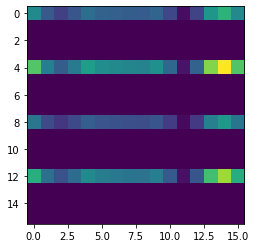

{0, 8, 4, 12}

01


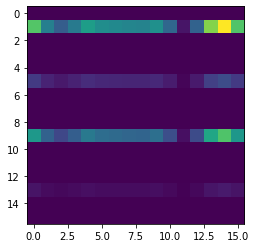

{1, 13, 5, 9}

10


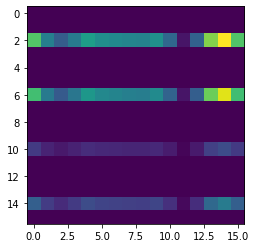

{2, 10, 6, 14}

11


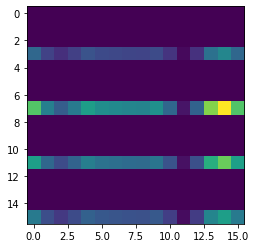

{11, 3, 15, 7}



In [157]:
bStrings = ['00', '01', '10', '11']
rowDict = {}
for b in bStrings:
    print(b)
    dOdV = explicit_dOdV(b, V, state)
    plt.imshow(np.abs(dOdV))
    plt.show()
    args = np.argwhere(dOdV)
    print(set(args[:, 0]))
    rowDict[b] = set(args[:, 0])
    print()

00


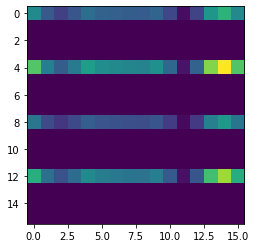

{0, 8, 4, 12}

01


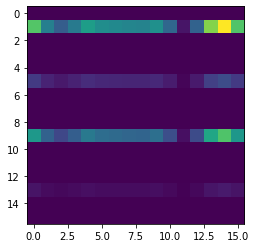

{1, 13, 5, 9}

10


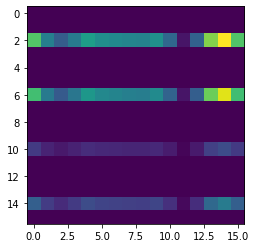

{2, 10, 6, 14}

11


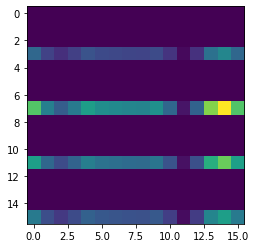

{11, 3, 15, 7}



In [158]:
bStrings = ['00', '01', '10', '11']
rowDict = {}
for b in bStrings:
    print(b)
    dOdV = explicit_dOdV2(b, V, state)
    plt.imshow(np.abs(dOdV))
    plt.show()
    args = np.argwhere(dOdV)
    print(set(args[:, 0]))
    rowDict[b] = set(args[:, 0])
    print()

In [159]:
rowDict

{'00': {0, 4, 8, 12},
 '01': {1, 5, 9, 13},
 '10': {2, 6, 10, 14},
 '11': {3, 7, 11, 15}}

Have a look at what $\mathbb{I} \otimes P_j$ looks like

00
[[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


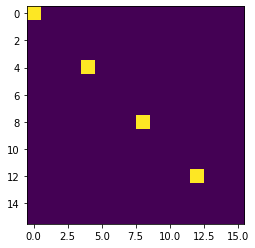

01
[[0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]]


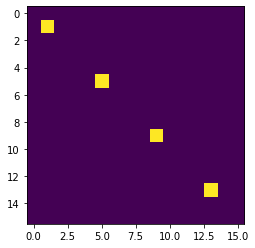

10
[[0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]]


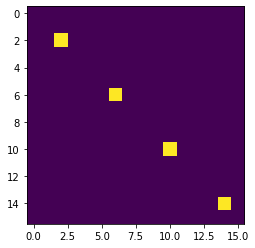

11
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]]


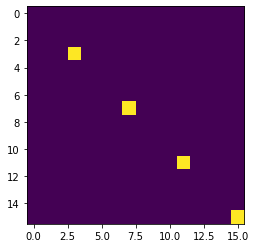

In [163]:
for b in bStrings:
    print(b)
    Pj = bitProjector(b)
    stateDim = 2**nQb
    traceDim = 2**(nQb - 2)

    I = np.eye(traceDim)
    IP = ncon([I, Pj], ((-1, -3), (-2, -4))).reshape(stateDim, stateDim)
    print(Pj)
    plt.imshow(IP)
    plt.show()

Clearly this would be like applying identity in some ways to $V |\phi>$

In [169]:
state = np.arange(2**nQb) + 1
Pj = bitProjector('00')
stateDim = 2**nQb
traceDim = 2**(nQb - 2)

I = np.eye(traceDim)
IP = ncon([I, Pj], ((-1, -3), (-2, -4))).reshape(stateDim, stateDim)

print(state)
print(IP@state)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 1.  0.  0.  0.  5.  0.  0.  0.  9.  0.  0.  0. 13.  0.  0.  0.]


So essentially the operation $(\mathbb{I} \otimes P_j) \cdot \phi$ selects the elements $\phi_k$ of $\phi$ where `(k - j) % remDim == 0`. In words it selects every `j + remDim` possible from the state. 

We can do this through lookup without executing the matrix multiplication

In [181]:
j = 0
remDim = stateDim // traceDim
indices = np.arange(j, stateDim, remDim)
print(indices)

efficientIPState = np.zeros(stateDim)
efficientIPState[indices] = state[indices]
print(efficientIPState)

[ 0  4  8 12]
[ 1.  0.  0.  0.  5.  0.  0.  0.  9.  0.  0.  0. 13.  0.  0.  0.]


So to calculate $(I \otimes P_j) \cdot V \cdot \phi$ efficiently we note that we actually only need to do the $k$ row of V multiplied by the state. 

In [221]:
V = np.random.randn(2**nQb, 2**nQb)
state = np.random.randn(2**nQb)

#V = np.arange(2**(nQb*2)).reshape(2**nQb, 2**nQb) + 1
#state = np.arange(2**nQb) + 1

for j in range(4):
    print(j)
    bStr = bStrings[j]
    Pj = bitProjector(bStr)
    stateDim = 2**nQb
    traceDim = 2**(nQb - 2)

    I = np.eye(traceDim)
    IP = ncon([I, Pj], ((-1, -3), (-2, -4))).reshape(stateDim, stateDim)
    IPV = IP @ V
    IPVstate = IPV @ state
    
    efficientIPV = np.zeros((2**nQb, 2**nQb))
    indices = np.arange(j, stateDim, remDim)
    efficientIPV[indices, :] = V[indices, :]
    print('IPV close: ', np.allclose(efficientIPV, IPV))
    
    efficientIPVstate = np.zeros(2**nQb)
    efficientIPVstate[indices] = np.einsum('ij, j -> i', V[indices, :], state)

    print('IPVstate close: ', np.allclose(IPVstate, efficientIPVstate))
    print()

0
IPV close:  True
IPVstate close:  True

1
IPV close:  True
IPVstate close:  True

2
IPV close:  True
IPVstate close:  True

3
IPV close:  True
IPVstate close:  True



Now consider how the outer product with the remaining state works

In [222]:
state = np.arange(2**nQb) + 1

stateDim = 2**nQb
traceDim = 2**(nQb - 2)
j = 0
remDim = stateDim // traceDim
indices = np.arange(j, stateDim, remDim)


IPVstate = np.zeros(2**nQb)
IPVstate[indices] = np.arange(len(indices))+1

In [224]:
print(IPVstate)
print(state)

[1. 0. 0. 0. 2. 0. 0. 0. 3. 0. 0. 0. 4. 0. 0. 0.]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [229]:
direct_outer = np.outer(IPVstate, state)
ncon_outer = ncon([IPVstate, state], ((-1,), (-2,)))
einsum_outer = np.einsum('i, j -> ij', IPVstate, state)
print(direct_outer)
print(np.allclose(ncon_outer, direct_outer))
print(np.allclose(einsum_outer, direct_outer))

[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  6.  9. 12. 15. 18. 21. 24. 27. 30. 33. 36. 39. 42. 45. 48.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  8. 12. 16. 20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60. 64.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

Essentially this is selecting each `k` row of the output matrix and weighting the state by the outcome of `IPVstate` at the `k` index. 

In [245]:
V = np.arange(2**(nQb*2)).reshape(2**nQb, 2**nQb) + 1
state = np.arange(2**nQb) + 1

stateDim = 2**nQb
traceDim = 2**(nQb - 2)
remDim = stateDim // traceDim

In [246]:
j = 0
bStr = bStrings[j]
indices = np.arange(j, stateDim, remDim)

In [247]:
print(V)
print(state)
dirdOdV = explicit_dOdV(bStr, V, state)
print(dirdOdV[0])

[[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16]
 [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32]
 [ 33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48]
 [ 49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64]
 [ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96]
 [ 97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112]
 [113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128]
 [129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144]
 [145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160]
 [161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176]
 [177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192]
 [193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208]
 [209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224]
 [225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 

In [256]:
efficient_outer = np.zeros((2**nQb, 2**nQb))
efficient_outer[indices, :] = np.einsum('ij, j -> i', V[indices, :], state)[:, np.newaxis] * state

In [258]:
print(np.allclose(dirdOdV, efficient_outer))

True


In [259]:
int('00', 2)

0

In [275]:
def efficientdOdV(bStr, V, state):
    '''
    Efficiently Calculate dOdV
    '''
    bInd = int(bStr, 2)
    
    stateDim = state.shape[0]
    traceDim = state.shape[0] // Pj.shape[0]
    remDim = stateDim // traceDim
    
    indices = np.arange(bInd, stateDim, remDim)

    dOdV = np.zeros((2**nQb, 2**nQb))
    dOdV[indices, :] = np.einsum('ij, j -> i', V[indices, :], state)[:, np.newaxis] * state.conj()
    return dOdV

In [276]:
bStrings = ['00', '01', '10', '11']

In [277]:
#V = np.arange(2**(nQb*2)).reshape(2**nQb, 2**nQb) + 1
#state = np.arange(2**nQb) + 1

V = np.random.randn(2**nQb, 2**nQb)
state = np.random.randn(2**nQb)

In [279]:
for j in range(4):
    bStr = bStrings[j]
    print(bStr)

    dirdOdV = explicit_dOdV(bStr, V, state)
    effdOdV = efficientdOdV(bStr, V, state)
    print(np.allclose(dirdOdV, effdOdV))
    print()

00
True

01
True

10
True

11
True



In [280]:
%%timeit
for j in range(4):
    bStr = bStrings[j]
    dirdOdV = explicit_dOdV(bStr, V, state)

716 µs ± 44.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [281]:
%%timeit
for j in range(4):
    bStr = bStrings[j]
    effdOdV = efficientdOdV(bStr, V, state)

45.5 µs ± 1.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
